In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

import models

%matplotlib inline

# 1. Лінійна регресія, оцінки МНК

## Позначення

$Y = X\beta + \epsilon$

$X$ - регресійна матриця розмірності $N\times p$

$Y$ - відгук

$\epsilon$ - похибка

## Припущення моделі:

- Х має повний ранг
- похибки мають однакову дисперсію
- похибки незалежні
- похибки мають нормальний розподіл $\epsilon \sim N(0,\sigma^2I$



In [2]:
iris = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


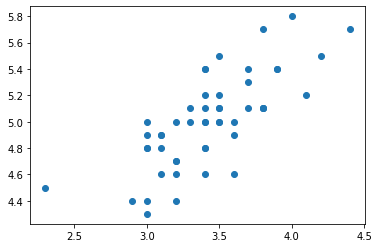

In [3]:
setosa = iris[iris.species == 'setosa']
plt.scatter(setosa.sepal_width, setosa.sepal_length)

## Оцінка МНК

$ \hat{\beta} = (X^{T} X)^{-1} X^TY$

## Приклад обчислення оцінки за формулою

In [4]:
# center the variables
x = setosa.sepal_width - setosa.sepal_width.mean()
y = setosa.sepal_length - setosa.petal_length.mean()

# compute beta
beta = models.estim_ls(x, y)

якщо нас цікавлять нецентровані дані, можна додати до X стовпчик з одиничок

In [5]:
x = np.array([
    setosa.sepal_width,
    np.ones(setosa.sepal_width.shape[0])]
).T
y = np.array(setosa.sepal_length)

beta = models.estim_ls(x, y)

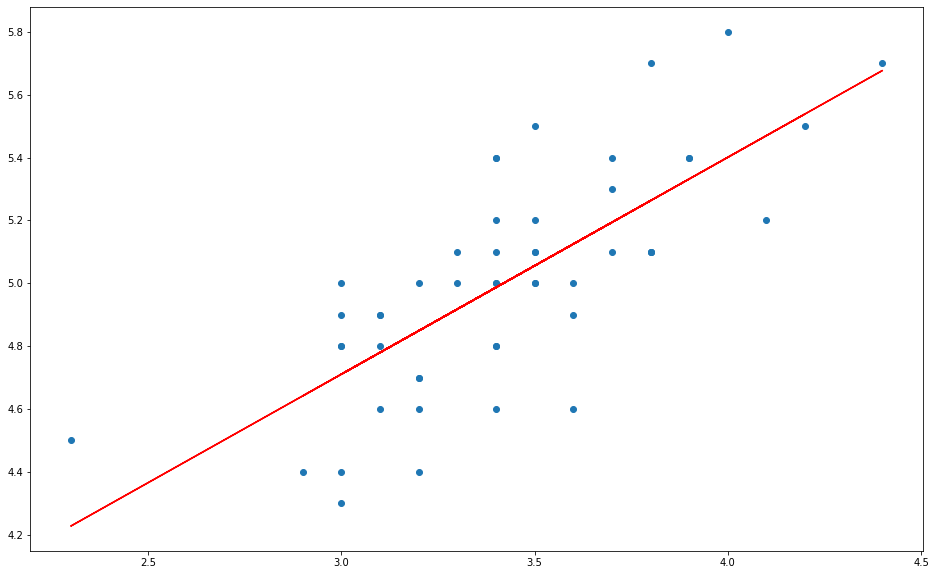

In [6]:
fig, ax = plt.subplots(figsize=(16,10))
ax.scatter(x[:,0], y)
ax.plot(x[:,0], x@beta, 'k-', color = 'r')

# 2. Обчислення ОНК методом градієнтного спуску

## Мотивація

Велика розмірність часом гальмує операції над матрицями, особливо обчислення оберненої матриці.

## Принцип роботи та алгоритм

Визначимо функціонал, який ми хочемо мінімізувати за допомогою градієнтного спуску:

$J(\beta) = \frac{1}{2N}||Y-X\beta||^2$

$N$ - кількість точок в наборі даних (розмірність)

В даному випадку функціонал опуклий і має єдину точку мінімуму. Для її знаходження виконують наступні дії:

- випадково ініціалізують параметр $\beta$
- роблять крок в сторону зменшення градієнта
- повторюють попередню інструкцію поки не буде досягнуто мінімуму або алгоритм не застрягне

Крок в сторону зменшення градієнта з learning rate $\alpha$ виглядатиме так:

$\beta_{n+1} = \beta_n - \frac{\alpha}{N}X^T(X\beta_n-Y)$

## Приклад

In [7]:
N = 10**5
x = np.array([
    np.random.normal(0, 1, N),
    np.random.normal(-1, 1, N),
    np.random.normal(2, 1, N)
]).T
beta_true = np.array([-2, 4, 8])
y = x @ beta_true + np.random.normal(0, 1, N)

x_train, x_test, y_train, y_test = train_test_split(
    x, y,
    test_size=0.1,
    random_state=42
)

In [8]:
beta = np.random.normal(0, 1, x.shape[1])
#
# fig, ax = plt.subplots(figsize=(16,10))
# ax.scatter(x_train[:,0], y_train)
# ax.plot(x_train[:,0], x_train@beta, 'k-', color = 'r')

In [9]:
# plt.plot(x_train[:,0])

In [10]:
alpha = 0.1
beta_estim = beta
for _ in range(15):
    beta_estim = models.estim_gd_step(
        x_train,
        y_train,
        alpha,
        beta_estim
    )
beta_estim

array([-1.7763978 ,  2.62905299,  7.30994407])

In [11]:
beta_estim_2 = models.estim_gd(
    x_train,
    y_train,
    alpha=0.1,
    n=150
)
beta_estim_2

array([-1.99861181,  3.99629281,  7.99733036])

# 3. Гребенева регресія (Ridge regression)

## Мотивація

Згідно з теоремою Гаусса-Маркова, ОНК має мінімальну дисперсію в класі незміщених оцінок. Якщо виникає проблема великої дисперсії оцінки ОНК, то чому б не пошукати оцінку з меншою дисперсією на класі зміщених оцінок?

## Принцип роботи

Замість мінімізації функціоналу

$J(\beta) = ||Y-X\beta||^2 \rightarrow \min$

будемо мінімізовувати функціонал, який дасть в результаті зміщену оцінку за рахунок "штрафу" за норму $\beta$:

$J(\beta) = ||Y-X\beta||^2 + \lambda||\beta||^2 \rightarrow \min$

## Оцінка рідж регресії

$\hat{\beta}_{RR} = (X^TX+\lambda I_p)^{-1}X^TY$

$p$ - кількість регресорів

In [12]:
x = np.array([
    setosa.sepal_width,
    np.ones(setosa.sepal_width.shape[0])]
).T
y = np.array(setosa.sepal_length)

beta = models.estim_ridge(x, y, 0.1)

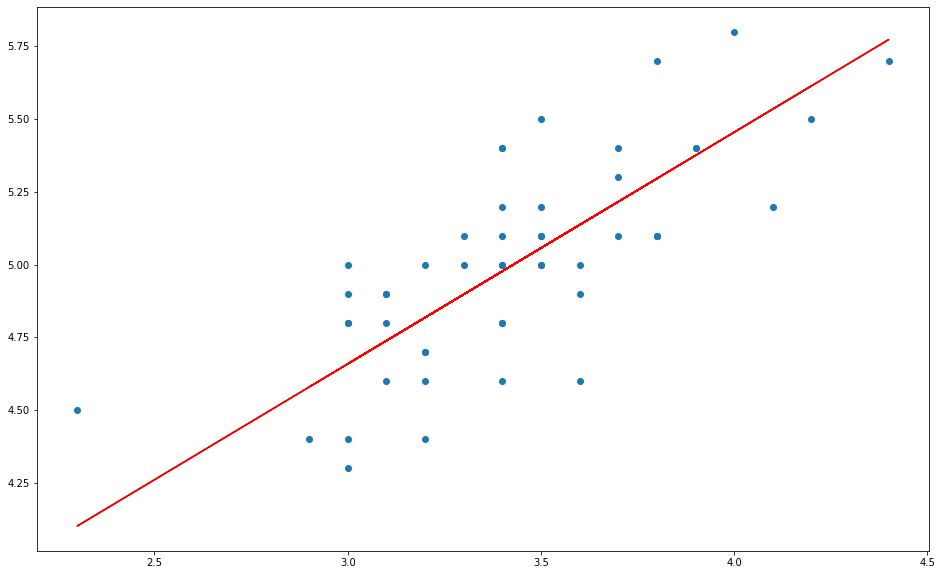

In [13]:
fig, ax = plt.subplots(figsize=(16, 10))
ax.scatter(x[:, 0], y)
ax.plot(x[:, 0], x @ beta, 'k-', color='r')

## Порівняємо ОНК і рідж оцінки

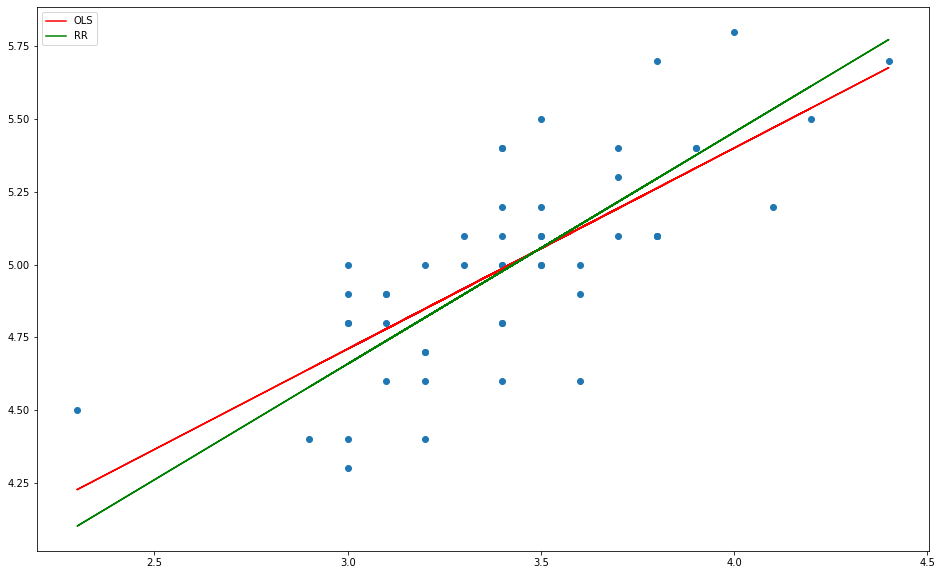

In [14]:
beta_ls = models.estim_ls(x,y)
beta_ridge = models.estim_ridge(x, y, 0.1)

fig, ax = plt.subplots(figsize=(16, 10))
ax.scatter(x[:, 0], y)
ax.plot(x[:, 0], x @ beta_ls, 'k-', color='r', label="OLS")
ax.plot(x[:, 0], x @ beta_ridge, 'k-', color='g', label="RR")
ax.legend()

# 4. LASSO (Least Absolute Shrinkage & Selection Operator)

## Мотивація і принцип роботи

У випадку гребеневої регресії розглядався клас зміщених оцінок; ми додавали обмеження на $L_2$-норму параметра $\beta$:

$J(\beta) = ||Y-X\beta||^2 + \lambda||\beta||^2_2 \rightarrow \min$

У випадку лассо ми теж вводимо обмеження на норму, але цього разу на $L_1$:

$J(\beta) = ||Y-X\beta||^2 + \lambda||\beta||_1 \rightarrow \min$

#### Чому ми не працюємо з $L_3$-нормою і більше?

Якщо зображувати в просторі частини функціоналу, то $L_2$-норма утворюватиме сферу з допустимих значень параметра $\beta$, $L_1$-норма - багатовимірні "ромби", більші за 2 норми - ромбоїди, з якими незручно працювати, менші за 1 дають негладку задачу.

##  Методи обчислення

1. Вивести формулу
2. Циклічний координатний спуск

# 5. Регресія на головні компоненти

## Мотивація

Метод головних компонент є методом зменшення розмірності даних. В задачах регресії його можна використовувати у випадках коли розмірність даних занадто велика і/або спостерігається мультіколінеарність (порушується умова незалежності регресорів)

## Алгоритм

- Переходимо в простір головних компонент
- Рахуємо ОНК в цьому просторі
- Оберненим перетворенням знаходимо значення параметрів для початкових регресорів

#### Шпаргалка:

Головні компоненти вибірки відповідають напрямам власних векторів вибіркової коваріаційної матриці. Вектори і їх кількість обираємо в порядку спадання модуля відповідного власного числа

## Приклад



In [15]:
cars = pd.read_csv("CarPrice_Assignment.csv")
cars.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [16]:
y = np.array(cars.price)
x = np.array(cars[[
    'highwaympg', 'citympg', 'peakrpm', 'horsepower',
    'compressionratio', 'boreratio', 'stroke',
    'enginesize', 'curbweight', 'carheight',
    'carwidth','carlength', 'wheelbase'
]])

In [17]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y,
    test_size=0.1,
    random_state=42
)

In [18]:
pca = models.PCA(x_train)
pca.get_eigenvalues()

array([1206.38616931,  429.52045541,  219.34975388,  165.46389358,
        105.46580604,   78.51011787,   59.8793228 ,   56.59041352,
         25.26429076,   17.6463455 ,   14.80296616,    9.36706273,
          3.75340243])

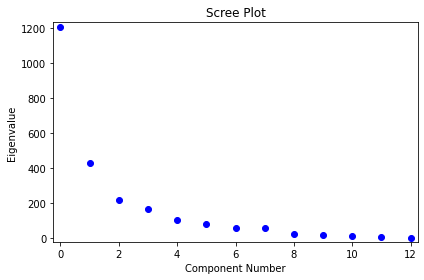

In [19]:
pca.plot_eigenvalues()

In [20]:
pca.transform_data(n_comp=4)
x_train_transformed = pca.get_transformed_data()

In [21]:
beta_ols = models.estim_ls(x_train, y_train)
beta_pca = models.estim_ls(x_train_transformed, y_train)

In [22]:
r2_score(y_train, x_train @ beta_ols)

0.8297549784555733

In [23]:
r2_score(y_test, x_test @ beta_ols)

0.9264510862880835

In [24]:
pca.fit_regression(y_train)
r2_score(y_train, pca.get_y_hat())

0.8395715779958134